# Predicting Medical Costs with Linear Regression

- The goal of this project is to accurately predict medical insurance costs for an individual, based on the factors outlined in the dataset.
- A linear regression model will be used on the data, where the independent variables, eg. sex, age, number of children etc. are used to find an equation which best predicts the outcome of the independent variable, which in this case, is the cost of medical insurance for an individual.
- The dataset provides data on approximately 1300 individuals.

- First, the necessary libraries are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Exploring the data

- Initial exploratory data analysis (EDA) is then performed, to better understand the data
- The goal of EDA is to determine whether there are any siginficant findings in the dataset, such as how many null values there are, whether any of the columns need to be cleaned, explore any statistically significant correlations and more

In [2]:
insurance_costs = pd.read_csv('insurance.csv')
insurance_costs.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_costs.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
insurance_costs.corr()['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

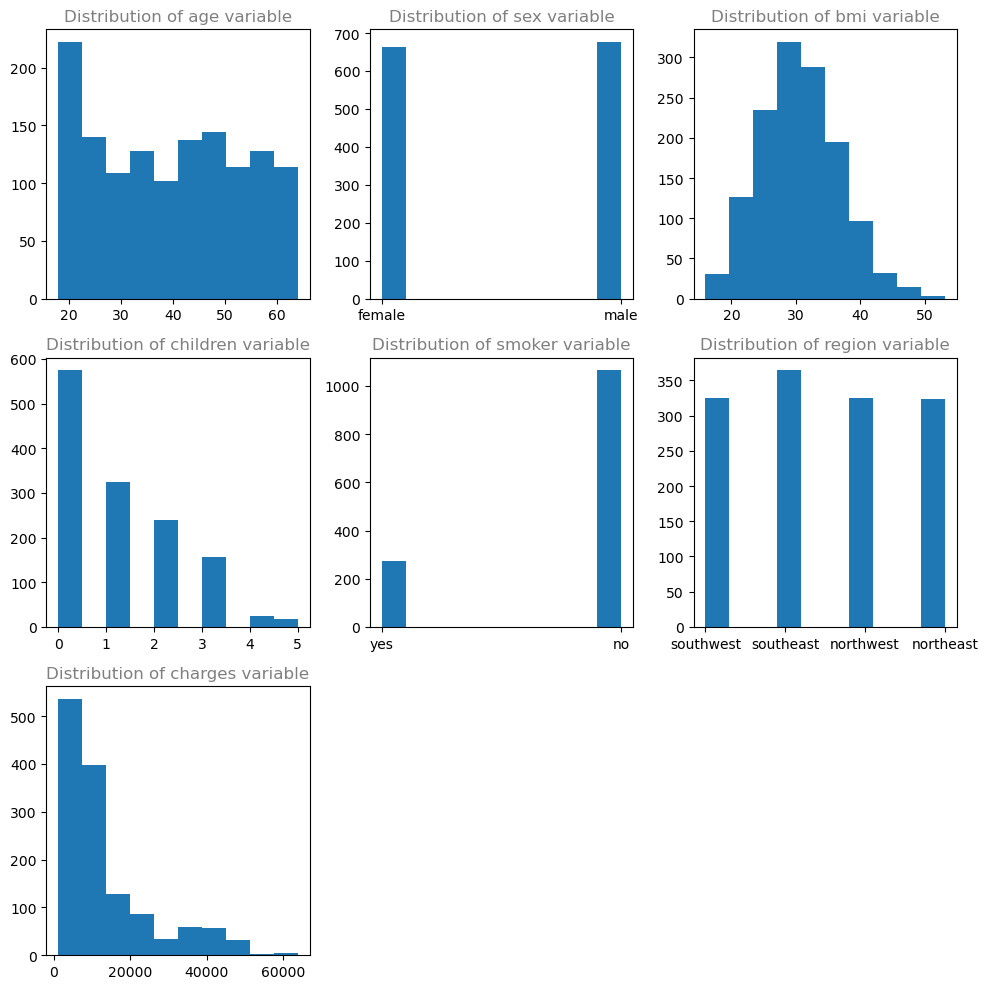

In [5]:
fig = plt.figure(figsize=(10,10))
for i, col in enumerate(insurance_costs.columns):
    ax = fig.add_subplot(3, 3, i+1)
    ax.hist(insurance_costs[col])
    ax.set_title(f'Distribution of {col} variable', alpha=0.5)
    
plt.tight_layout()
plt.show()

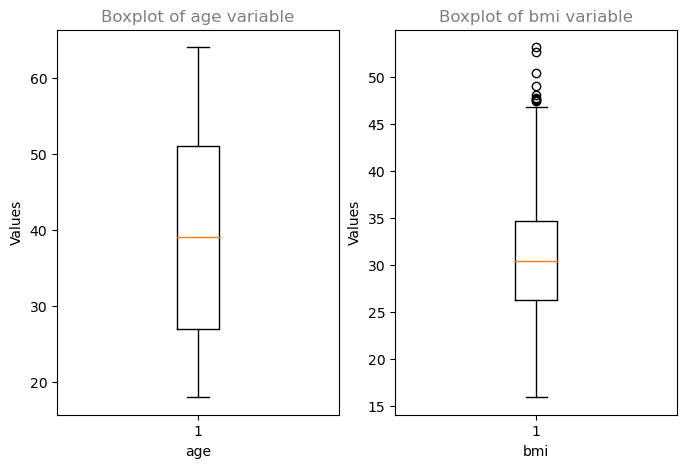

In [6]:
box_plot_cols = ['age', 'bmi']
fig2 = plt.figure(figsize=(8, 5))
for i, col in enumerate(box_plot_cols):
    ax = fig2.add_subplot(1, 2, i+1)
    ax.boxplot(insurance_costs[col])
    ax.set_xlabel(col)
    ax.set_ylabel('Values')
    ax.set_title(f'Boxplot of {col} variable', alpha=0.5)

plt.tight_layout
plt.show()

- The above plots show the distribution of the different variables in the dataset, as well as the boxplots for the 'age' and 'bmi' variables, which demonstrated the strongest correlations with the 'charges' variable. The plots shows there are very few variables with a normal distribution, as well as a high number of outliers in the distribution of the 'bmi' variable, indicating that a MinMaxScaler may be a good option for scaling the data

### Cleaning the data

- There are also categorical variables that cannot be used as they currently stand and need to be transformed into dummy variables

In [7]:
insurance_with_dummies = pd.get_dummies(insurance_costs, columns=['sex', 'region', 'smoker'])

In [8]:
insurance_with_dummies.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


In [9]:
X = [col for col in insurance_with_dummies.columns if col != 'charges']
y = insurance_with_dummies['charges']

- To avoid issues with scaling, a scaling formula is used. The values associated with some variables are significantly larger or smaller than the values associated with other variables, which creates an unequal contribution to model fitting. The MinMaxScaler attemps to solve this problem, by fitting all values associated with a variable in the 0-1 range. 

In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(insurance_with_dummies[X])

In [11]:
X_scaled = pd.DataFrame(X_scaled, columns = X)

In [12]:
X_scaled.head()

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,0.021739,0.321227,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.000000,0.479150,0.2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.304348,0.347592,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### Creating the model

- Finally, the Linear Regression model is used to fit the data, using a train and test subset for the independent and dependent variables. Mean squared error has been used as the metric to analyse the accuracy of the predictions. 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=729, test_size=0.2)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
coefficients = model.coef_
intercept = model.intercept_
mse = mean_squared_error(y_test, predictions)


In [15]:
print(f'Mean Squared error: {mse}\n')
print(f'Coefficients: {coefficients}\n')
print(f'Intercept: {intercept}\n')

Mean Squared error: 33256363.490114883

Coefficients: [ 11803.49492769  13192.39118381   2505.15471438     69.56275536
    -69.56275536    691.0774526     452.3698004    -465.66287486
   -677.78437814 -12198.40202105  12198.40202105]

Intercept: 9481.1825074601



- The above mean squared error figure indicates there were clear discrepanices between the predicted insurance costs and the actual costs. However, the figure may not represent a poor model, as many of the insurance costs were in the thousands, so even a prediction value around 1% off the actual value could have led to numbers in the hundreds and thousands being squared, leading to a large number for the mean squared error. 
- To better evaluate model performance, the mean squared error can be compared to other models that are fit on the same data

- Some variables demonstrated lower coefficient values according to the model. Therefore, the effect these variables had on the price of medical insurance was less extreme than the variables with higher coefficient values, where a small unit change in these variables will have had a more significant change in insurance costs, given all other variables remained constant. A new model, with a refined set of predictors could improve the accuracy of the model. For example, the 'age', 'bmi' and 'smoker_no'/'smoker_yes' variables had the most extreme coefficient values:

In [16]:
refined_predictors = ['age', 'bmi', 'smoker_no', 'smoker_yes']
refined_X = X_scaled[refined_predictors]

X_train2, X_test2, y_train2, y_test2 = train_test_split(refined_X, y, random_state=729, test_size=0.2)

In [17]:
model_2 = LinearRegression()
model_2.fit(X_train2, y_train2)
predictions2 = model_2.predict(X_test2)
coefficients2 = model_2.coef_
intercept2 = model_2.intercept_
mse2 = mean_squared_error(y_test2, predictions2)

In [18]:
print(f'Mean Squared error: {mse2}\n')
print(f'Coefficients: {coefficients2}\n')
print(f'Intercept: {intercept2}\n')

Mean Squared error: 32825992.551507607

Coefficients: [ 11914.95146375  12512.86556092 -12187.83077263  12187.83077263]

Intercept: 10213.6769765721



- The mean squared error for the new model is reduced, but close to that of the original model, indicating that the exclusion of variables had minimal impact on model performance.
- Overall, the factors leading to the largest changes in insurance costs according to both models, based on the dataset, for a person were their age, their BMI and whether or not the person is a smoker.

- For improved prediction of insurance costs, further modelling could be done, such as using a Gradient Boosting Regressor, Support Vector Machines and Random Forests